In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# load mnist dataset
mnist = tf.keras.datasets.mnist # mnist is dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data() # fill our training/testing tensors

# normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# build model (output has 10 units for the 10 discrete possible classifications)
model = tf.keras.models.Sequential() # feedforward model
model.add(tf.keras.layers.Flatten()) # first layer flattens image matrix into vector
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer is dense, with 128 units and uses relu for activation fxn
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer is dense, with 10 units and uses softmax for probability distribution

# set training parameters
model.compile(optimizer='adam', # adam optimizer: good default just like relu
              loss='sparse_categorical_crossentropy', # loss=amount of error, which is what model tries to minimize
              metrics=['accuracy']) # also output accuracy during training

# train model
model.fit(x_train, y_train, epochs=1) # epoch=a training cycle that iterates through all the training data once

# we should see a decrease in loss and a corresponding increase in accuracy
# but did we overfit?

# check with test data (not used in training process, so should be unbiased)
val_loss, val_acc = model.evaluate(x_test, y_test)
print('test loss: {}'.format(val_loss))
print('test accuracy: {}'.format(val_acc))

# loss and accuracy should be slightly worse
# big red flag if they are same or better

# save model
model.save('mnist_4layer.model')

Epoch 1/1
10000/10000 [==============================] - 0s 23us/step
test loss: 0.1361885470330715
test accuracy: 0.9572


predicted number: 7


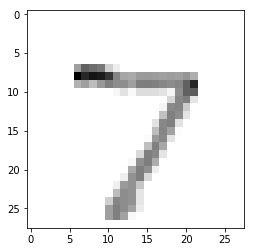

In [3]:
#load model
new_model = tf.keras.models.load_model('mnist_4layer.model')

#make predictions
predictions = new_model.predict(x_test) #predictions will be a matrix of probability dist derived via softmax previously
print('predicted number: {}'.format(np.argmax(predictions[0]))) #pick a test choice with largest probability
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()